In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/employee-attrition-and-factors/HR_Analytics.csv.csv


# Employee Attrition and Factors Clustering
 ● Objective: The goal is to cluster employees based on various factors
 contributing to attrition to identify patterns and insights that can help
 organizations reduce turnover and improve employee retention
 strategies.
- The Employee Attrition and Factors Dataset provides valuable insights into employee behaviors and characteristics, specifically focusing on the factors influencing employee turnover (attrition). Attrition, or the rate at which employees leave a company, is a critical metric for any organization, as it can significantly impact operational efficiency, morale, and recruitment costs.

- This dataset offers a collection of attributes related to the personal and professional aspects of employees, allowing organizations to analyze patterns and identify the key drivers of employee attrition. By clustering employees based on various factors, organizations can develop targeted strategies for retention, improve work environments, and optimize human resource management.

## This datasets include the columns:
1. Age:	The age of the employee. (Numerical)
2. Attrition:	Whether or not the employee has left the organization. (Categorical)
3. BusinessTravel:	The frequency of business travel for the employee. (Categorical)
4. DailyRate:	The daily rate of pay for the employee. (Numerical)
5. Department:	The department the employee works in. (Categorical)
6. DistanceFromHome:	The distance from home in miles for the employee. (Numerical)
7. Education:	The level of education achieved by the employee. (Categorical)
8. EducationField:	The field of study for the employee's education. (Categorical)
9. EmployeeCount:	The total number of employees in the organization. (Numerical)
10. EmployeeNumber:	A unique identifier for each employee profile. (Numerical) and etc.......

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

In [44]:
# Load the dataset
df = pd.read_csv("/kaggle/input/employee-attrition-and-factors/HR_Analytics.csv.csv")
df.head() # print sample

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [46]:
df.drop(columns=['EmployeeCount', 'Over18'], inplace=True)

In [47]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager   

#  missing values finding using value_counts and unique()

- here there is no missing values exist but finding missing values using this functions to find any nun values exists 

In [48]:
print(df['Attrition'].value_counts())
print(df['Attrition'].unique())

Attrition
No     1233
Yes     237
Name: count, dtype: int64
['Yes' 'No']


In [49]:
print(df['BusinessTravel'].value_counts())
print(df['BusinessTravel'].unique())

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


In [50]:
print(df['Department'].value_counts())
print(df['Department'].unique())

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
['Sales' 'Research & Development' 'Human Resources']


In [ ]:
print(df['EducationField'].value_counts())
print(df['EducationField'].unique())

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']


In [52]:
print(df['Gender'].value_counts())
print(df['Gender'].unique())

Gender
Male      882
Female    588
Name: count, dtype: int64
['Female' 'Male']


In [53]:
print(df['JobRole'].value_counts())
print(df['JobRole'].unique())

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']


In [54]:
print(df['MaritalStatus'].value_counts())
print(df['MaritalStatus'].unique())

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64
['Single' 'Married' 'Divorced']


In [55]:
print(df['OverTime'].value_counts())
print(df['OverTime'].unique())

OverTime
No     1054
Yes     416
Name: count, dtype: int64
['Yes' 'No']


In [56]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [57]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to the 'Attrition', 'Business Travel', 'Department', 'Education field', 'Gender', 'Job Role', 'Marital status, 'over18', 'over time'columns
df['Attrition'] = le.fit_transform(df['Attrition'])

df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])

df['Department'] = le.fit_transform(df['Department'])

df['EducationField'] = le.fit_transform(df['EducationField'])

df['Gender'] = le.fit_transform(df['Gender'])

df['JobRole'] = le.fit_transform(df['JobRole'])

df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])

df['OverTime'] = le.fit_transform(df['OverTime'])


df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,4,80,1,6,3,3,2,2,2,2


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EmployeeNumber            1470 non-null   int64
 9   EnvironmentSatisfaction   1470 non-null   int64
 10  Gender                    1470 non-null   int64
 11  HourlyRate                1470 non-null   int64
 12  JobInvolvement            1470 non-null   int64
 13  JobLevel                  1470 non-null   int64
 14  JobRole                   1470 non-null 

In [59]:
# Encode categorical variables
# le = LabelEncoder()
# categorical_columns = ['Department', 'EducationField', 'Gender', 'MaritalStatus']
# for col in categorical_columns:
#     df[col] = le.fit_transform(df[col])

# Normalize numeric columns    # Standardizing numeric variables.
#numeric_columns = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'JobSatisfaction', 'WorkLifeBalance']
#scaler = StandardScaler()
#df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

#print(df.head())

In [63]:
# Normalize numeric columns     # Standerdize the numeric columns
numeric_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction', 
                   'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 
                   'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 
                   'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
                   'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 
                   'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
                   'YearsWithCurrManager']

scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])  # Scale and update the DataFrame

# Use df[numeric_columns] or create df_scaled if needed for clustering or further processing
df_scaled = df[numeric_columns].to_numpy()  # Convert to NumPy if clustering requires a separate array


# EDA(Exploratory Data Analysis)

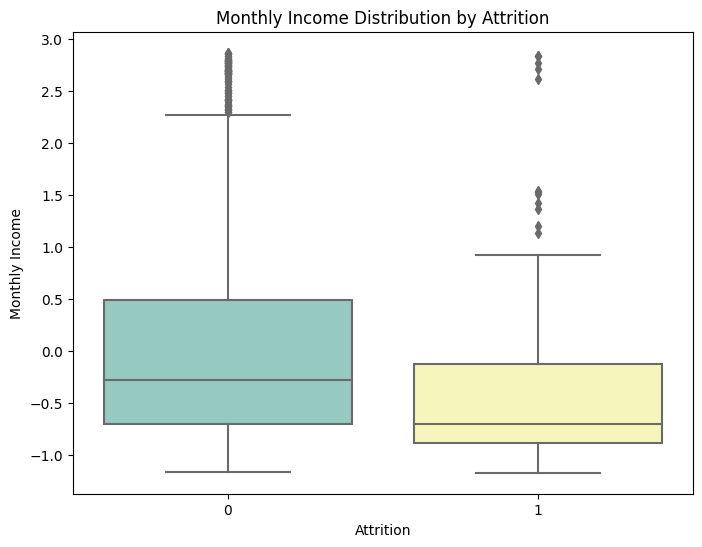

In [61]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette='Set3')
plt.title('Monthly Income Distribution by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()

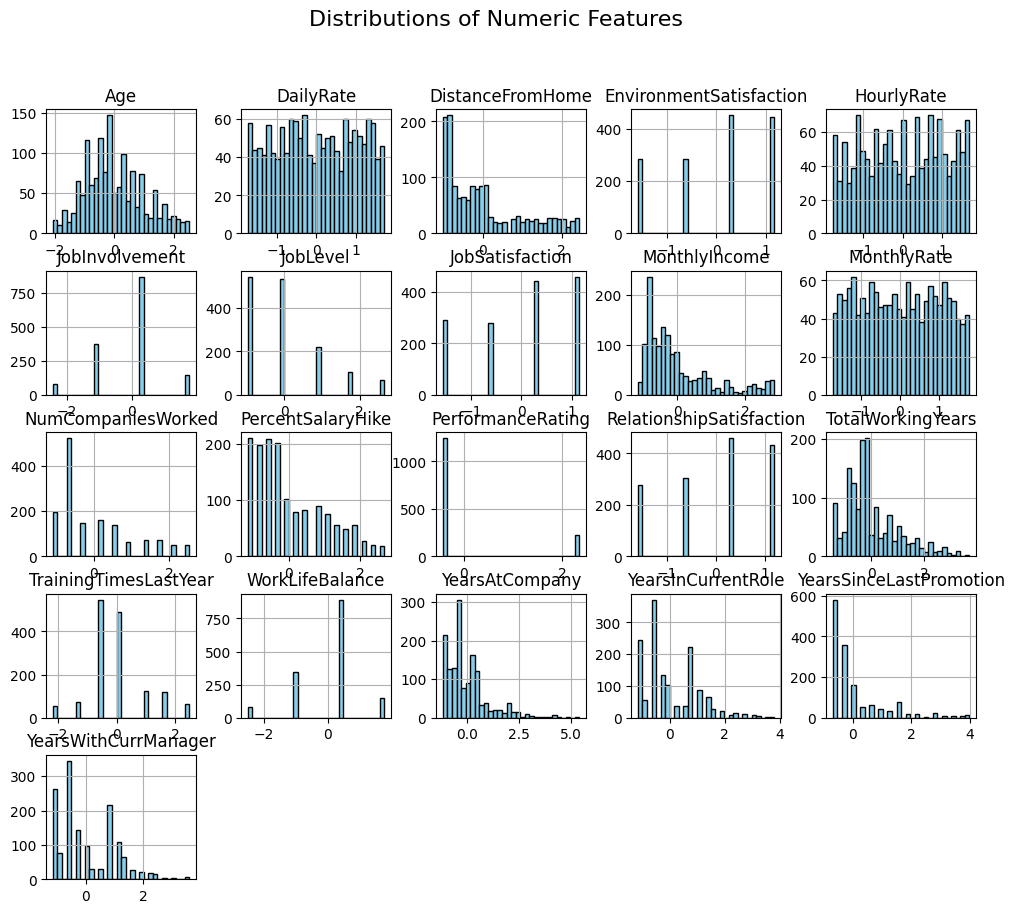

In [64]:
# Plot histograms
df[numeric_columns].hist(bins=30, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distributions of Numeric Features", fontsize=16)
plt.show()

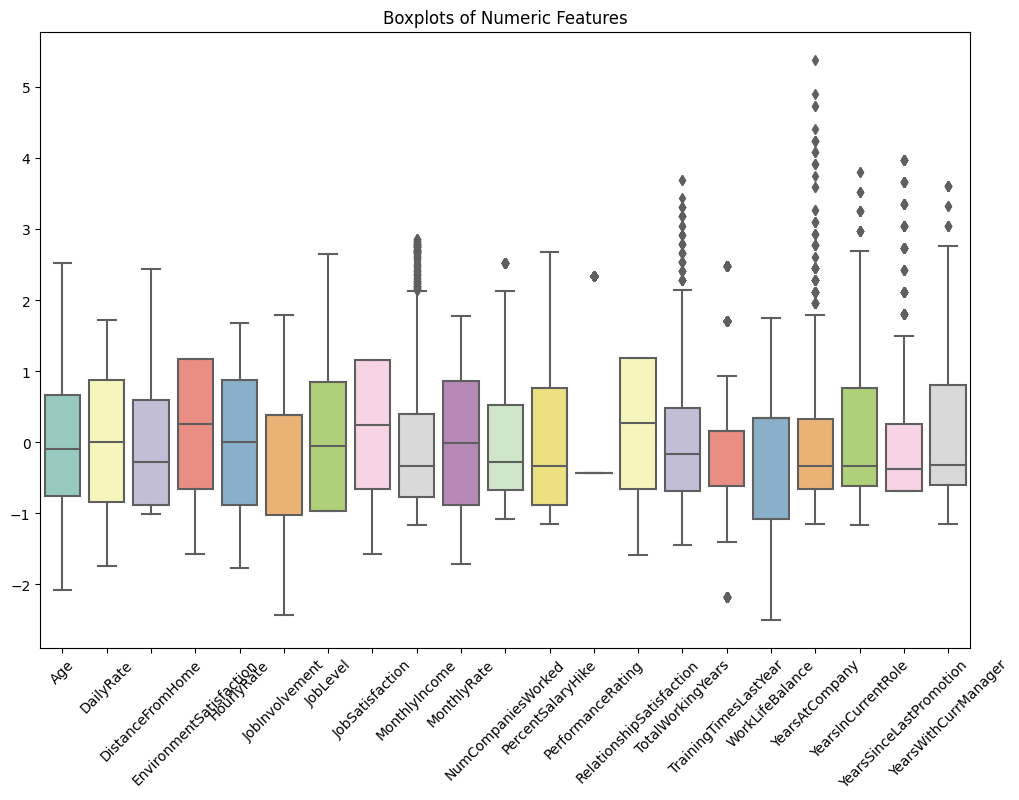

In [65]:
# Plot boxplots for numeric columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_columns], palette='Set3')
plt.title("Boxplots of Numeric Features")
plt.xticks(rotation=45)
plt.show()

# Feature Correlation Heatmap
- showing the correlation between numerical features in this dataset

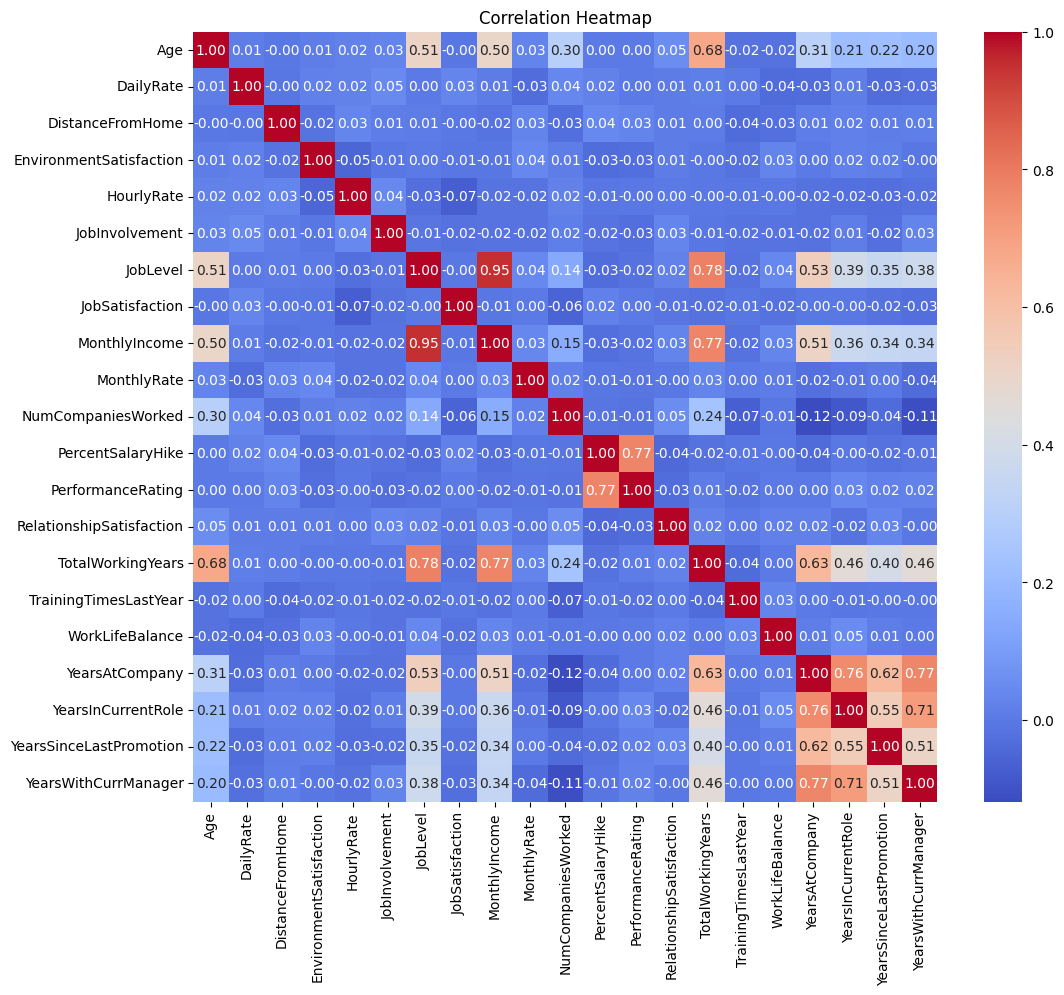

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()


# Remove outliers

In [ ]:
# df_cleaned = remove_outliers(df, numeric_columns)

In [66]:
def remove_outliers(df, numeric_columns):  # Removing outliers with the IQR method.
    df_filtered = df.copy()  # Create a copy to avoid modifying the original DataFrame
    
    for column in numeric_columns:
        Q1 = df[column].quantile(0.25)  # 25th percentile
        Q3 = df[column].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1                   # Interquartile Range

        # Apply the IQR filter
        df_filtered = df_filtered[
            (df_filtered[column] >= Q1 - 1.5 * IQR) & 
            (df_filtered[column] <= Q3 + 1.5 * IQR)
        ]
        
    return df_filtered

numeric_columns = [
    'Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
    'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
    'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 
    'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
    'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
    'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
    'YearsWithCurrManager'
]

# Remove outliers
df_cleaned = remove_outliers(df, numeric_columns)

# Display the cleaned DataFrame
print("DataFrame after removing outliers:")
print(df_cleaned)

DataFrame after removing outliers:
           Age  Attrition  BusinessTravel  DailyRate  Department  \
2     0.008343          1               2   1.414363           1   
3    -0.429664          0               1   1.461466           1   
5    -0.539166          0               1   0.502054           1   
9    -0.101159          0               2   1.230910           1   
11   -0.867672          0               2  -1.610141           1   
...        ...        ...             ...        ...         ...   
1463 -0.648668          0               0  -1.183736           1   
1464 -1.196177          0               2   0.903668           2   
1465 -0.101159          0               1   0.202082           1   
1468  1.322365          0               1   0.546677           2   
1469 -0.320163          0               2  -0.432568           1   

      DistanceFromHome  Education  EducationField  EmployeeNumber  \
2            -0.887515          2               4               4   
3         

# 1. K-Means Clustering

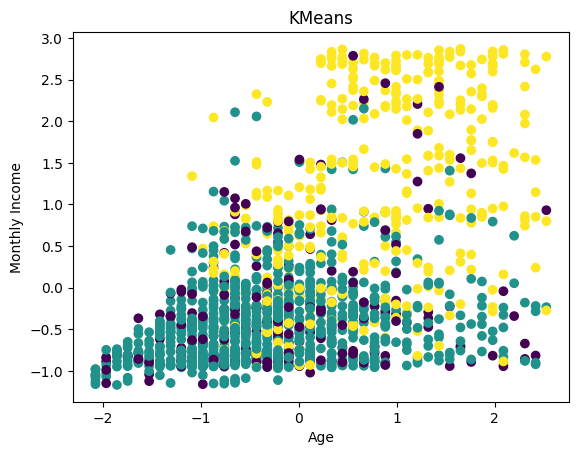

In [67]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply KMeans with a specified number of clusters (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)

df['KMeans_Cluster'] = kmeans.labels_

plt.scatter(df['Age'], df['MonthlyIncome'], c=df['KMeans_Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.title('KMeans')
plt.show()


# (Elbow Method for KMeans)

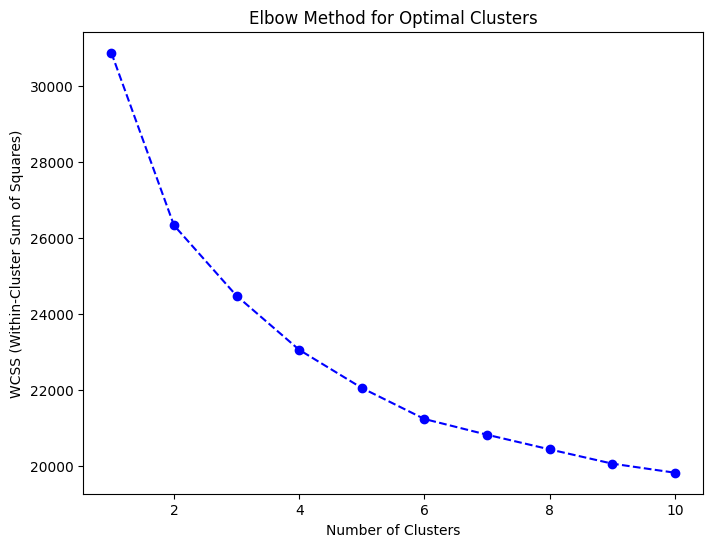

In [68]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Clusters')
plt.show()


# 2.  Hierarchical Clustering 

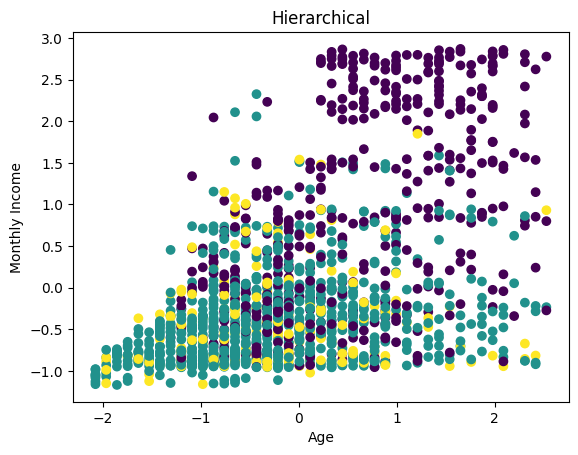

In [69]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
df['Hierarchical_Cluster'] = hierarchical.fit_predict(df_scaled)

# Visualize the clusters
plt.scatter(df['Age'], df['MonthlyIncome'], c=df['Hierarchical_Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.title('Hierarchical')
plt.show()


# 3. GMM (Gussain Mixture Model clustering)

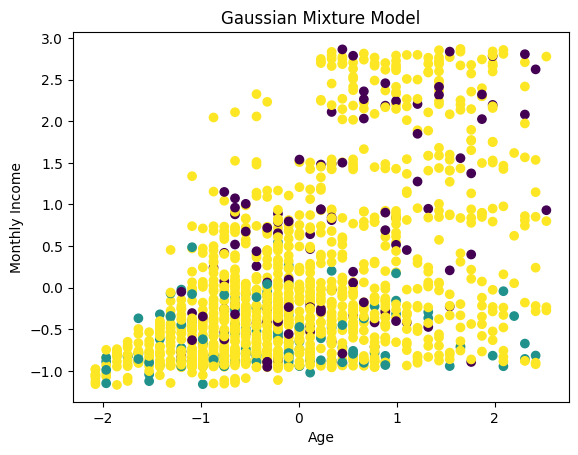

In [70]:
from sklearn.mixture import GaussianMixture

# Apply GMM with a specified number of components (clusters)
gmm = GaussianMixture(n_components=3, random_state=42)
df['GMM_Cluster'] = gmm.fit_predict(df_scaled)

# Visualize the clusters
plt.scatter(df['Age'], df['MonthlyIncome'], c=df['GMM_Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.title('Gaussian Mixture Model')
plt.show()


## Silhouette_score

- Silhouette Score: Measures how similar an object is to its cluster compared to other clusters. Higher values indicate better-defined clusters.

In [71]:
from sklearn.metrics import silhouette_score

# Silhouette Score for KMeans
silhouette_kmeans = silhouette_score(df_scaled, df['KMeans_Cluster'])
print(f'Silhouette Score (KMeans): {silhouette_kmeans}')

# Silhouette Score for Hierarchical Clustering
silhouette_hierarchical = silhouette_score(df_scaled, df['Hierarchical_Cluster'])
print(f'Silhouette Score (Hierarchical): {silhouette_hierarchical}')

# Silhouette Score for GMM
silhouette_gmm = silhouette_score(df_scaled, df['GMM_Cluster'])
print(f'Silhouette Score (GMM): {silhouette_gmm}')


Silhouette Score (KMeans): 0.14486263278852243
Silhouette Score (Hierarchical): 0.11489232592680165
Silhouette Score (GMM): 0.0888966472395982


## Calinski_harabasz_score

- Calinski-Harabasz Index: Also known as the Variance Ratio Criterion, this measures the ratio of between-cluster dispersion to within-cluster dispersion. Higher values indicate better clustering.

In [72]:
from sklearn.metrics import calinski_harabasz_score

# Calinski-Harabasz Index for KMeans
ch_kmeans = calinski_harabasz_score(df_scaled, df['KMeans_Cluster'])
print(f'Calinski-Harabasz Index (KMeans): {ch_kmeans}')

# Calinski-Harabasz Index for Hierarchical Clustering
ch_hierarchical = calinski_harabasz_score(df_scaled, df['Hierarchical_Cluster'])
print(f'Calinski-Harabasz Index (Hierarchical): {ch_hierarchical}')

# Calinski-Harabasz Index for GMM
ch_gmm = calinski_harabasz_score(df_scaled, df['GMM_Cluster'])
print(f'Calinski-Harabasz Index (GMM): {ch_gmm}')


Calinski-Harabasz Index (KMeans): 191.60323955455848
Calinski-Harabasz Index (Hierarchical): 161.89927415324289
Calinski-Harabasz Index (GMM): 73.46294723628834


In [73]:
# Compile All results Together
results = {
    'Algorithm': ['KMeans', 'Hierarchical', 'GMM'],
    'Silhouette Score': [silhouette_kmeans, silhouette_hierarchical,silhouette_gmm],
    'Calinski-Harabasz Index': [ch_kmeans, ch_hierarchical,ch_gmm]           # dictionary
}

# Create a DataFrame for better visualization
results_df = pd.DataFrame(results)
print("Clustering Results Comparison:")
print(results_df)


Clustering Results Comparison:
      Algorithm  Silhouette Score  Calinski-Harabasz Index
0        KMeans          0.144863               191.603240
1  Hierarchical          0.114892               161.899274
2           GMM          0.088897                73.462947


## Predict Which Cluster Model is Best

# KMeans:

- Silhouette Score: 0.144863 (Highest among the three).
- Calinski-Harabasz Index: 191.603240 (Highest among the three).

# Hierarchical:

- Silhouette Score: 0.114892 (Second highest).
- Calinski-Harabasz Index: 161.899274 (Second highest).

# GMM:

- Silhouette Score: 0.088897 (Lowest).
- Calinski-Harabasz Index: 73.462947 (Lowest).

- Based on the Silhouette Score and Calinski-Harabasz Index, the KMeans algorithm is the best-performing clustering model for this dataset. It provides the most well-defined clusters with higher inter-cluster separations and lower intra-cluster dispersion.

## Visualizing the result

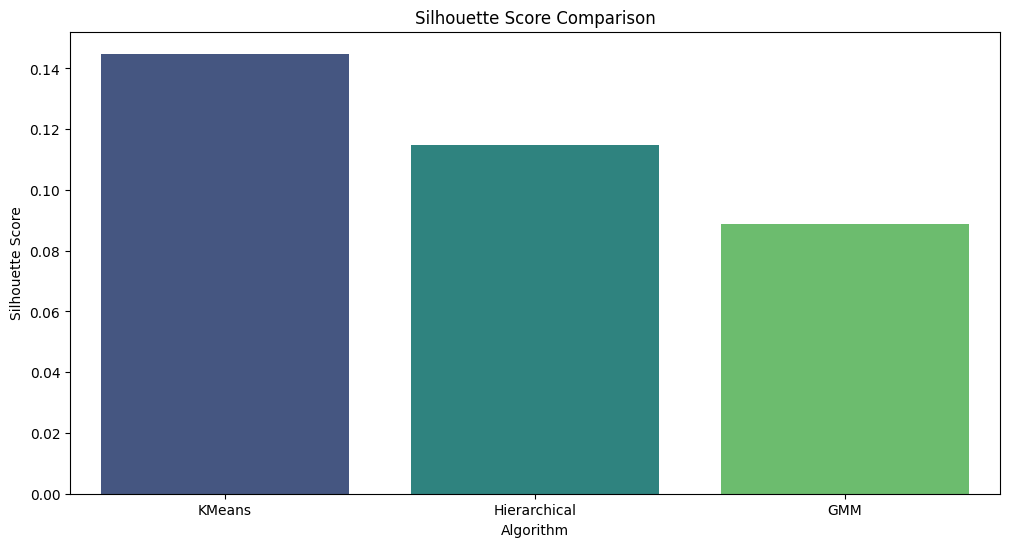

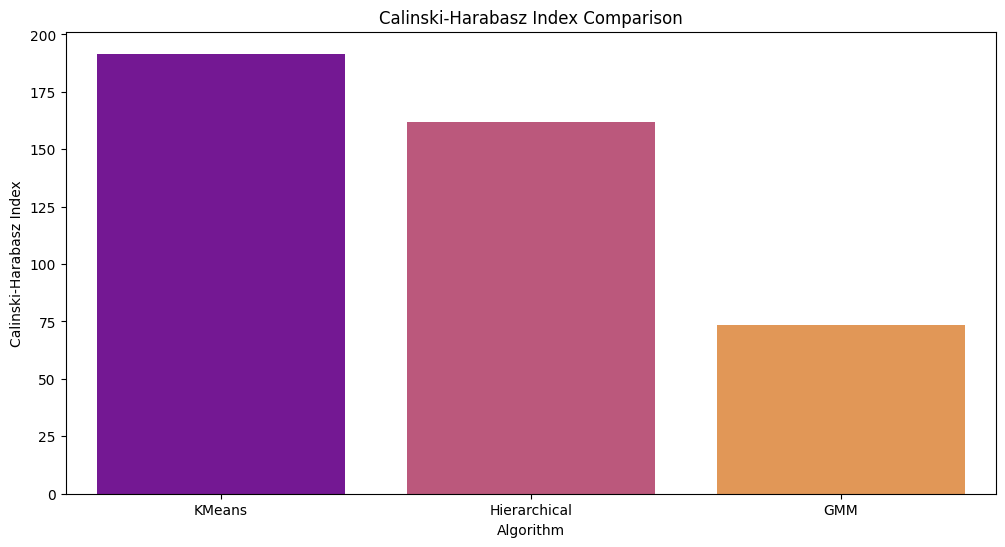

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x='Algorithm', y='Silhouette Score', data=results_df, palette='viridis')
plt.title('Silhouette Score Comparison')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Algorithm', y='Calinski-Harabasz Index', data=results_df, palette='plasma')
plt.title('Calinski-Harabasz Index Comparison')
plt.show()

# Heatmap for All Clusters Features

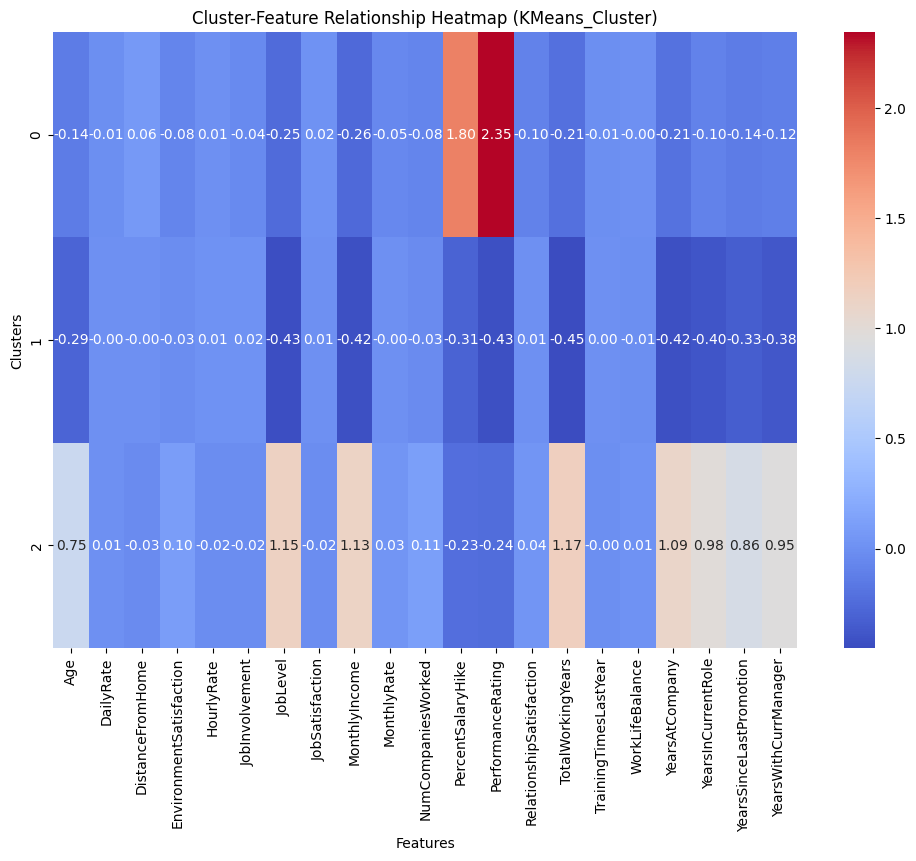

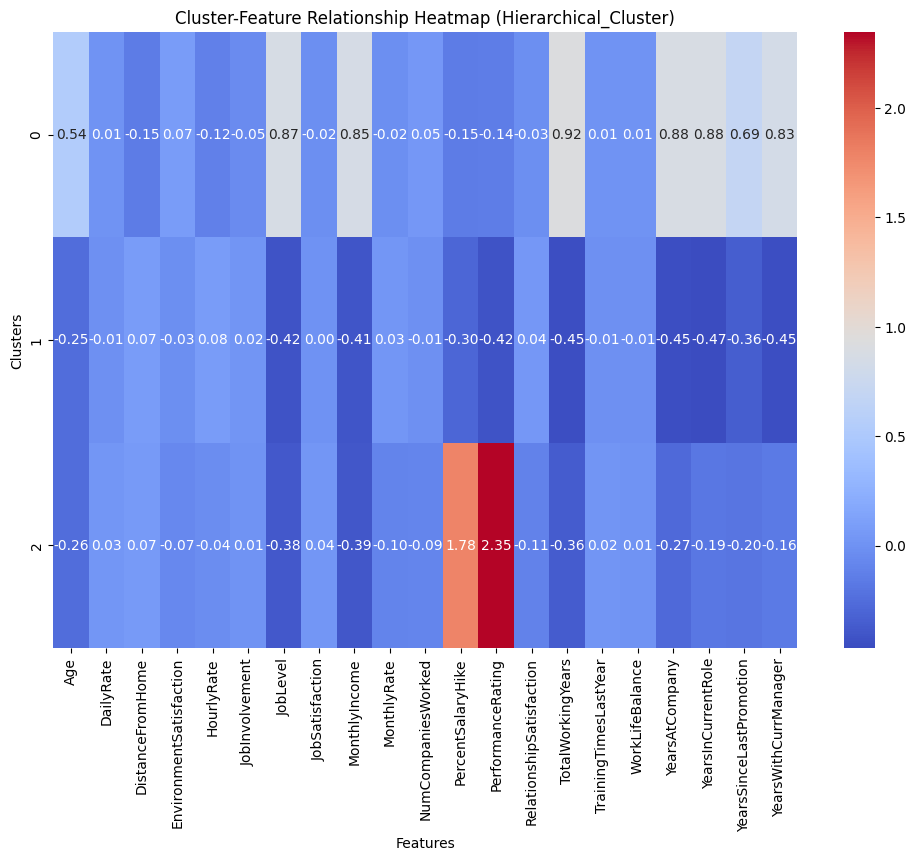

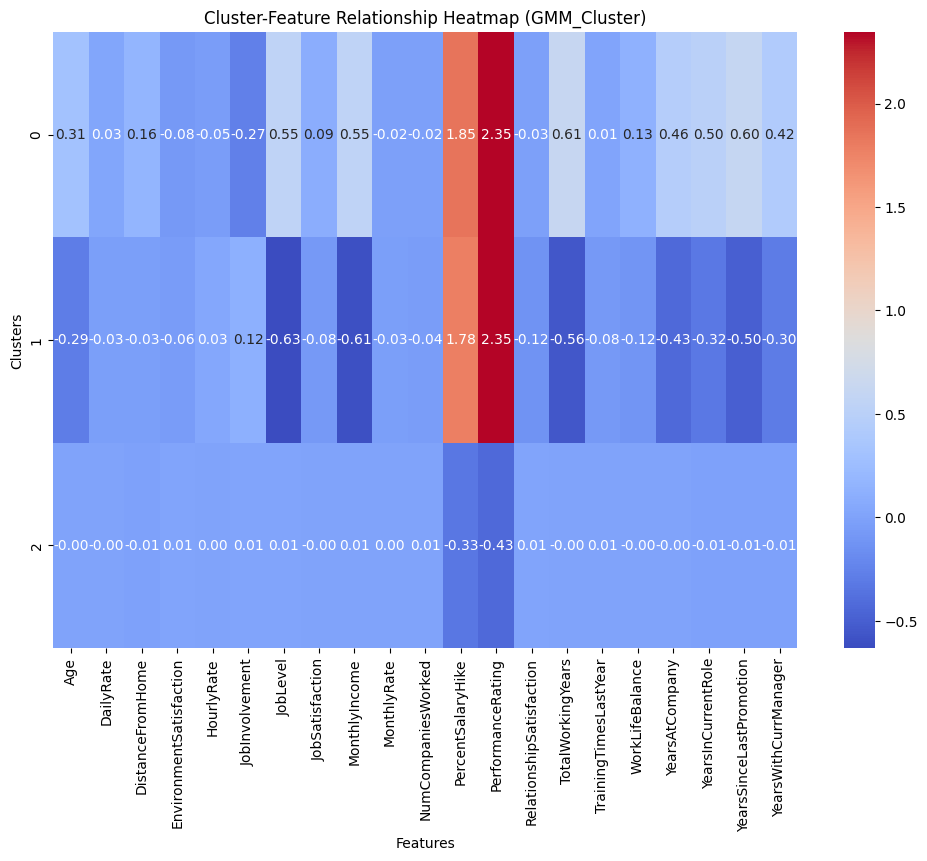

In [79]:
# Add a list of cluster columns to compare
cluster_columns = ['KMeans_Cluster', 'Hierarchical_Cluster', 'GMM_Cluster']

# Compute mean values for all cluster columns
for cluster in cluster_columns:
    cluster_means = df.groupby(cluster)[numeric_columns].mean()
    
    # Plot heatmap for each clustering method
    plt.figure(figsize=(12, 8))
    sns.heatmap(cluster_means, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title(f"Cluster-Feature Relationship Heatmap ({cluster})")
    plt.xlabel("Features")
    plt.ylabel("Clusters")
    plt.show()


In [76]:
# Save the models
df.to_csv('clustered_employeeAttrition_data.csv', index=False)
print("Clustered dataset saved successfully!")

Clustered dataset saved successfully!
